In [2]:
# Imports needed 
import numpy as np
import matplotlib.pyplot as plt
import cv2   # Computer vision library

%matplotlib inline

In [3]:
# Read the image
image = cv2.imread('images/water_balloons.jpg')

# Dimensions of the image 
print("The Dimensions of the image are: ",image.shape)

The Dimensions of the image are:  (638, 960, 3)


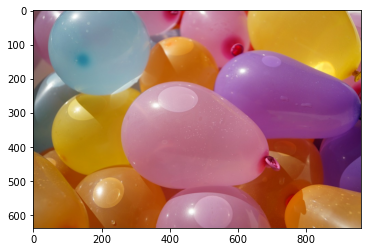

In [4]:
# Make a copy of the image
image_copy = np.copy(image)

# Change BGR to RGB
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

# Diplay the image
plt.imshow(image_copy)

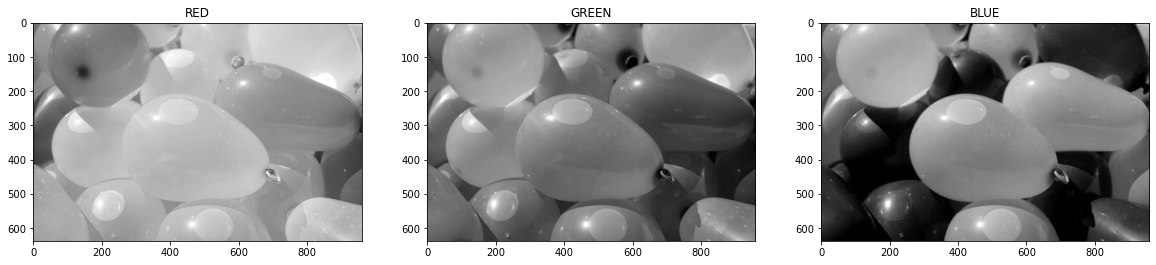

In [5]:
# TO extract a single color we need to plot the channels seperately r g b and h s v
r = image_copy[:,:,0]
g = image_copy[:,:,1]
b = image_copy[:,:,2]

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize =(20,10))

ax1.set_title("RED")
ax1.imshow(r,cmap = 'gray')

ax2.set_title("GREEN")
ax2.imshow(g,cmap = 'gray')

ax3.set_title("BLUE")
ax3.imshow(b,cmap = 'gray')

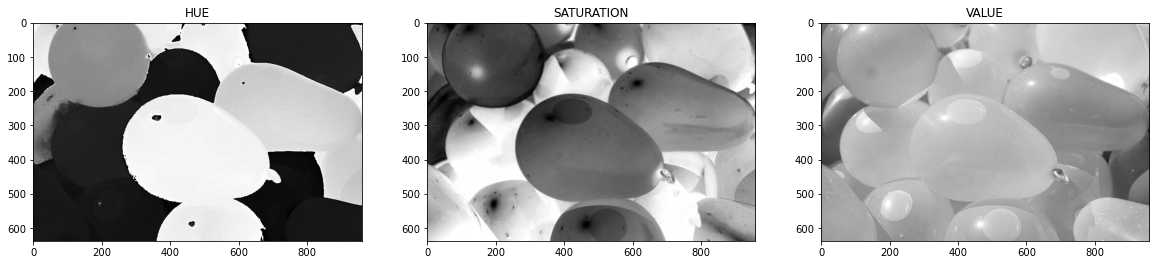

In [7]:
# Converting RGB to HSV 
hsv = cv2.cvtColor(image_copy,cv2.COLOR_RGB2HSV)

# Setting parameter for hsv
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize =(20,10))

ax1.set_title("HUE")
ax1.imshow(h,cmap = 'gray')

ax2.set_title("SATURATION")
ax2.imshow(s,cmap = 'gray')

ax3.set_title("VALUE")
ax3.imshow(v,cmap = 'gray')

In [8]:
# Define our color selection criteria in HSV values (USE COLOR PICKER)
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])

In [9]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

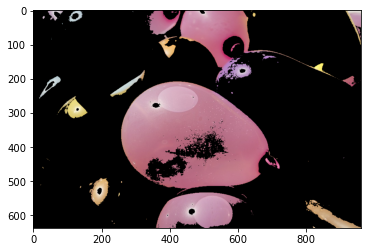

In [12]:
# Define the masked area in RGB space
mask_rgb = cv2.inRange(image_copy, lower_pink, upper_pink) # except pink all black

# mask the image
masked_image = np.copy(image_copy)
masked_image[mask_rgb==0] = [0,0,0]  # superimpose the mask on the real image only black part

# Vizualize the mask
plt.imshow(masked_image)

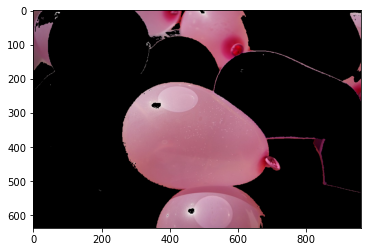

In [13]:
# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image_copy)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)